# Supervised ML, from First Principles

The goal is to learn a function from data that approximates the true distribusion the data originally comes from (assuming that the sampled data is an accurate representation of the original distribusion, else this is where/how bias creeps in).

The process is simple:
1. Have a bunch of "weights" that are "learnable", a.k.a , start off with random values which we will iteratively update "somehow" as we converge to a desired behaviour.
2. Perform prediction using the existing model with existing weights to generate an output, then compare the prediction with the expected. The difference between the 2 is computed as loss.
3. Once we know the loss,we can find its gradient, and then move long the gradient to minimize the loss by iteratively updating the weights of the model until the converge at a point which best represents the training data witin the constraints inherent to the model.


In [ ]:
import numpy as np
import math

In [ ]:
x = np.linspace(-math.pi, math.pi, 10000)
y= np.sin(x)

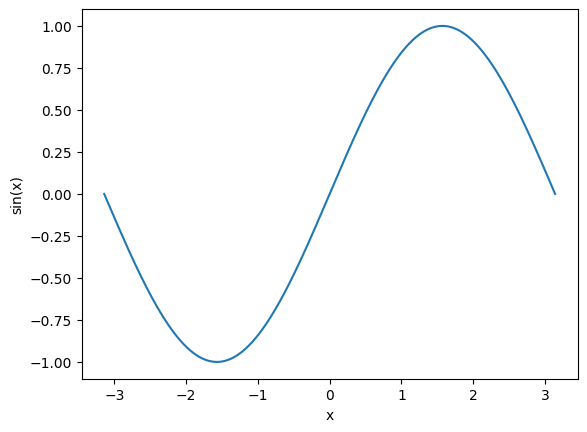

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

Under some assumptions  ( [Stone–Weierstrass theorem](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem) ) we can use a polynomial to approximate the kinda of data we have have generated. So the learning-task is going to be about learning the coeifficients!


In [ ]:
# learnable coefficients: a,b,c,d
# model is gonna be ax + bx^2 + cx^3 + d

In [ ]:
a = np.random.random()
b = np.random.random()
c = np.random.random()
e = np.random.random()

learning_rate = 1e-6


In [ ]:

print(f"Initial values\n a:{a} , b:{b} , c:{c} , e: {e}")
model = lambda x: a*x + b*x**2 + c*x**3 + e

loss_fn = lambda y_pred, y_true: np.square(y_pred - y_true).sum()
d_loss_fn = lambda y_pred, y_true: 2*(y_pred - y_true)

for n in range(30000):
  i= n % len(x)
  # forward pass to make a prediction
  y_pred = model(x[i])
  # compute scalar loss : sum( (expected - predicted)^2 )
  loss = loss_fn(y_pred, y[i])

  # derivatives of model output
  d_loss = d_loss_fn(y_pred, y[i])
  # calculate gradients
  grad_e = d_loss.sum()
  grad_c = (d_loss * x[i]**3).sum()
  grad_b = (d_loss * x[i]**2).sum()
  grad_a = (d_loss * x[i]).sum()

  # weight update
  e -= learning_rate * grad_e
  c -= learning_rate * grad_c
  b -= learning_rate * grad_b
  a -= learning_rate * grad_a


print(f"Result y = {a}.x + {b}.x^2 + {c}.x^3 + {e}")
print(f"Final Loss: {loss}")

Initial values
 a:0.4154889674086668 , b:0.7118275930898039 , c:0.2246721628179459 , e: 0.053724716756818
Result y = 0.36545029445323013.x + 0.2685674740045283.x^2 + -0.08093743801968167.x^3 + -0.027720250125873716
Final Loss: 1.5981164664047627


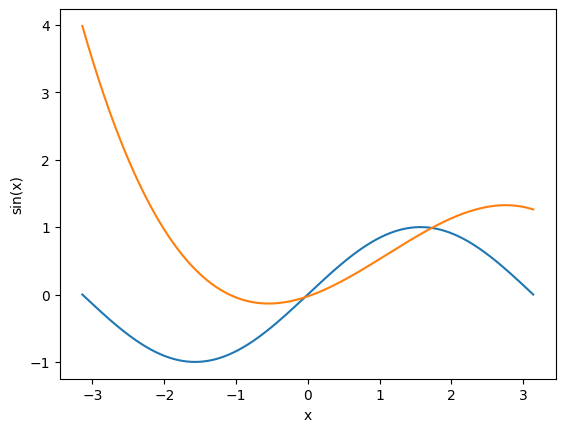

In [ ]:
# plot predictions using the learn't coefficients
y_pred = model(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

# What happens if we sample outside the training distribusion ?

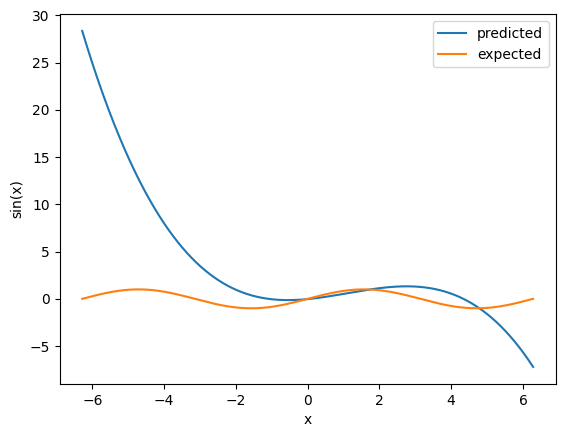

In [ ]:
new_data = np.linspace(-2*math.pi, 2*math.pi,10000)

# outside training dist predictions
new_preds = model(new_data)
expected = np.sin(new_data)

# plot
plt.plot(new_data, new_preds, label='predicted')
plt.plot(new_data, expected, label='expected')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

It has no clue what a sin() really is but has a very good LOCAL approximation bound to the training distribusion.

But what else can we do here ? Maybe adding terms to the polynomial helps?

# What if we add more terms to the polynomial?

In [ ]:
a = np.random.random()
b = np.random.random()
c = np.random.random()
e = np.random.random()

# adding 2 new polynomial terms
u = np.random.random()
v = np.random.random()


learning_rate = 1e-6

print(f"Initial values\n a:{a} , b:{b} , c:{c} , e: {e}")
model = lambda x: a*x + b*x**2 + c*x**3 + u*x**4 + v*x**5 + e

loss_fn = lambda y_pred, y_true: np.square(y_pred - y_true).sum()
d_loss_fn = lambda y_pred, y_true: 2*(y_pred - y_true)

for n in range(30000):
  i= n % len(x)
  # forward pass to make a prediction
  y_pred = model(x[i])
  # compute scalar loss : sum( (expected - predicted)^2 )
  loss = loss_fn(y_pred, y[i])

  # derivatives of model output
  d_loss = d_loss_fn(y_pred, y[i])
  # calculate gradients
  grad_e = d_loss.sum()
  grad_v = (d_loss * x[i]**5).sum()
  grad_u = (d_loss * x[i]**4).sum()
  grad_c = (d_loss * x[i]**3).sum()
  grad_b = (d_loss * x[i]**2).sum()
  grad_a = (d_loss * x[i]).sum()

  # weight update
  e -= learning_rate * grad_e
  c -= learning_rate * grad_c
  b -= learning_rate * grad_b
  a -= learning_rate * grad_a
  u -= learning_rate * grad_u
  v -= learning_rate * grad_v


print(f"Result y = {a}.x + {b}.x^2 + {c}.x^3 + {u}.x^4 + {v}.x^5 + {e}")
print(f"Final Loss: {loss}")


Initial values
 a:0.4796883643185106 , b:0.20076505750350337 , c:0.5590015617424025 , e: 0.2553617399098205
Result y = 0.4586047057135763.x + 0.1741926677885679.x^2 + 0.5076776584107855.x^3 + 0.0313944778637448.x^4 + -0.0726378633858962.x^5 + 0.23590896751329807
Final Loss: 0.001784969506311325


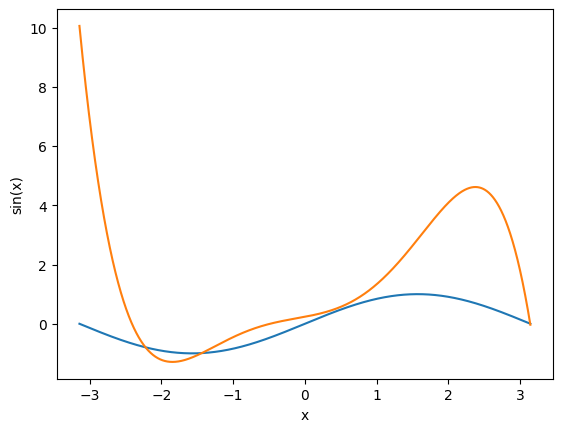

In [ ]:
# plot predictions using the learn't coefficients
y_pred = model(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

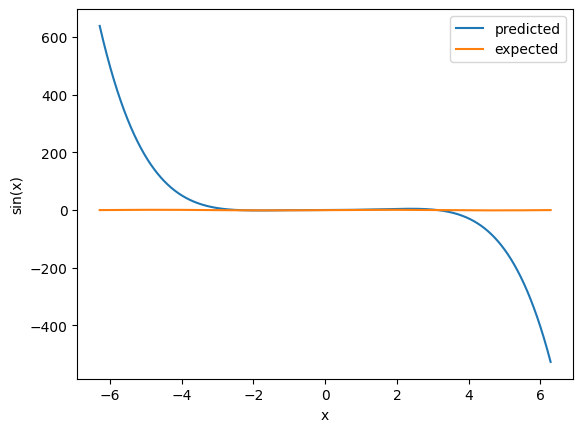

In [ ]:
# And how does this new model with additional terms do when we show it new_data?
new_data = np.linspace(-2*math.pi, 2*math.pi,10000)

# outside training dist predictions
new_preds = model(new_data)
expected = np.sin(new_data)

# plot
plt.plot(new_data, new_preds, label='predicted')
plt.plot(new_data, expected, label='expected')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

# Observation from trying to build a model with learnable parameters

Slightly better than not using 2 additional terms but still far far away from a sin().

So why should we even try to pick a shape like a polynomial of (a,b,c,e,u,v) ? what cant that be something the model also learns along with the coefficients ?


# Building a fully "Parameterized-Model"

This is were we go one level meta, we comeup with a simple "affine" function (`W.x + b`) that can help capture all linear relationships thought it and we sprinkle in some non-linear activation functions! ***"Composition"*** of affine maps with nonlinearities produces expressivity.

## Affine Functions
Think of these as really simple polynomials of degree 1 and nothing more.
- z = W.x => affine
- z = W.x +b => affine
- z = W.x^2 + b => NOT AFFINE


Affine maps preserve straightness:
- lines → lines
- parallelism → parallelism
- convex combinations → convex combinations

Affine maps help us:
- rotate
- scale
- shear
- translate

> Note that when we say affine we say it in the context of the input space and not in terms of weights or any other quantity!



In [ ]:
# Demonstrating affine behaviour with some basic transforms on 2 parallel lines by plotting them before and after an affine map.

import numpy as np
import matplotlib.pyplot as plt

def plot_affine_transformation(original_lines_data, affine_matrix, translation_vector, title="Affine Transformation"):
    plt.figure(figsize=(10, 6))

    # Plot original and transformed lines
    for i, (x_coords, y_coords) in enumerate(original_lines_data):
        # Stack x and y to create points for transformation
        points_original = np.vstack([x_coords, y_coords])
        plt.plot(points_original[0], points_original[1], label=f'Original Line {i+1}')

        # Apply transformation
        transformed_points = np.dot(affine_matrix, points_original) + translation_vector
        plt.plot(transformed_points[0], transformed_points[1], '--', label=f'Transformed Line {i+1}')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.legend()
    plt.axis('equal')
    plt.show()

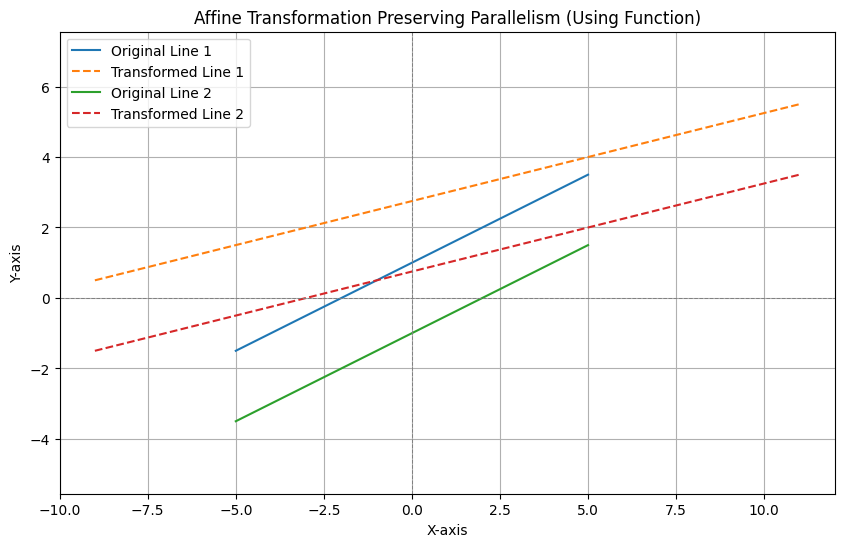

In [ ]:
# @title
# Example usage of the new function with the previously generated data

x_line = np.linspace(-5, 5, 100)
y_line1 = 0.5 * x_line + 1
y_line2 = 0.5 * x_line - 1

affine_matrix = np.array([[2, 0], [0, 1]])
translation_vector = np.array([[1], [2]])


original_lines = [(x_line, y_line1), (x_line, y_line2)]

plot_affine_transformation(original_lines, affine_matrix, translation_vector, "Affine Transformation Preserving Parallelism (Using Function)")

Notice that the most imporant lines are just:
```python
# Combine rotation and scaling
affine_matrix = np.dot(rotation_matrix, scaling_matrix)
```

representing the affine behaviour. Now once lets see what happens when we chain together multiple affine mappings, just like something you would see in a neural network.



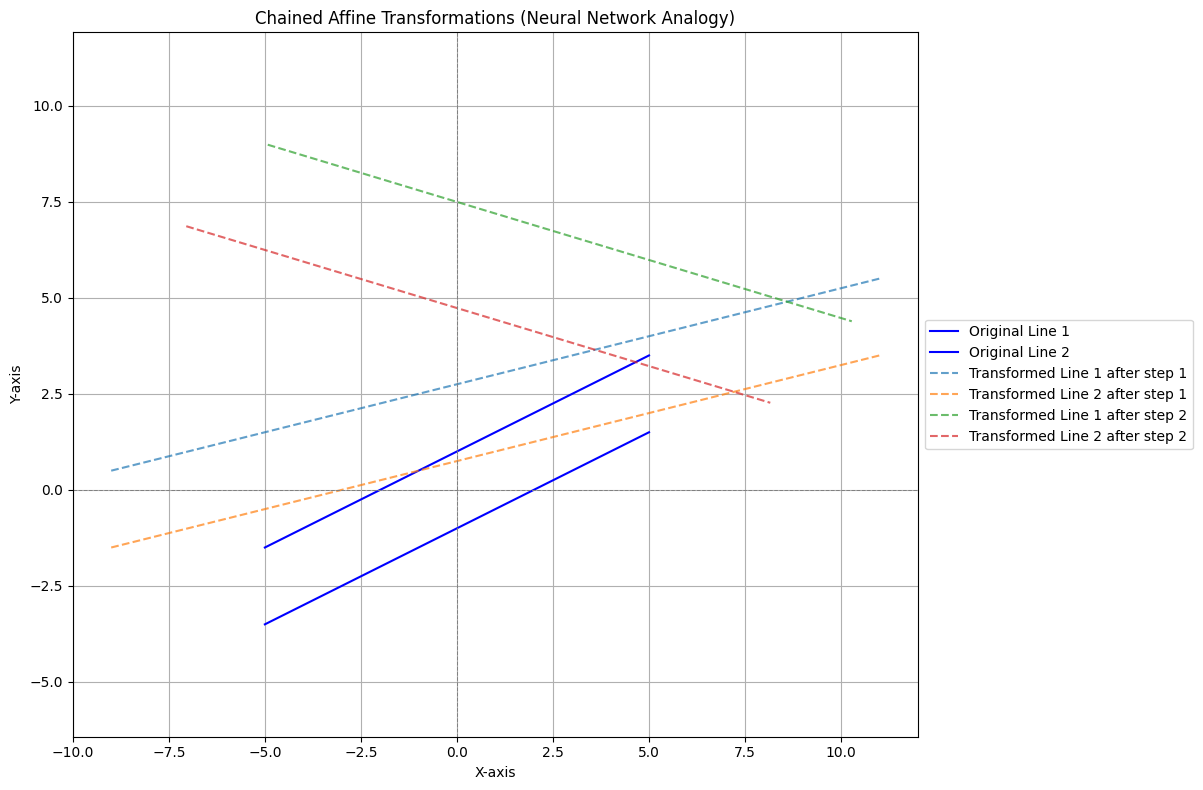

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def plot_chained_affine_transformation(original_lines_data, affine_transforms_list, title="Chained Affine Transformations"):
    plt.figure(figsize=(12, 8))

    # Plot original lines
    for i, (x_coords, y_coords) in enumerate(original_lines_data):
        points_original = np.vstack([x_coords, y_coords])
        plt.plot(points_original[0], points_original[1], label=f'Original Line {i+1}', color='blue', linestyle='-')

    # Apply chained transformations and plot intermediate results
    current_points_list = [np.vstack([x_coords, y_coords]) for x_coords, y_coords in original_lines_data]

    for k, (affine_matrix, translation_vector) in enumerate(affine_transforms_list):
        next_points_list = []
        for j, points in enumerate(current_points_list):
            transformed_points = np.dot(affine_matrix, points) + translation_vector
            plt.plot(transformed_points[0], transformed_points[1], linestyle='--', alpha=0.7, label=f'Transformed Line {j+1} after step {k+1}')
            next_points_list.append(transformed_points)
        current_points_list = next_points_list

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Define a second affine transformation
theta_2 = np.radians(-45) # Rotate -45 degrees
rotation_matrix_2 = np.array([
    [np.cos(theta_2), -np.sin(theta_2)],
    [np.sin(theta_2), np.cos(theta_2)]
])
scaling_matrix_2 = np.array([
    [0.7, 0],
    [0, 1.5]
])
affine_matrix_2 = np.dot(rotation_matrix_2, scaling_matrix_2)
translation_vector_2 = np.array([[-1], [4]])

# Combine the first and second transformations into a list
# We'll use the affine_matrix and translation_vector from earlier, and the newly defined ones
affine_transforms = [
    (affine_matrix, translation_vector), # First transformation
    (affine_matrix_2, translation_vector_2) # Second transformation
]

# Reuse the original lines from previous steps
original_lines = [
    (np.linspace(-5, 5, 100), 0.5 * np.linspace(-5, 5, 100) + 1),
    (np.linspace(-5, 5, 100), 0.5 * np.linspace(-5, 5, 100) - 1)
]

plot_chained_affine_transformation(original_lines, affine_transforms, "Chained Affine Transformations (Neural Network Analogy)")

Notice how no amount of affine functions can help us model a simple function like x^3. This because any composition of affine transformations collapses to a single affine transformation, so it cannot represent even simple nonlinear functions like x^3 without introducing a nonlinearity

> affine ∘ affine ∘ affine = affine

This is why we need to introduce non-linearity into our model so it can learn to represent complex, non-linear relationships which might be present in the data we wish to learn from.

## Non-Linearity


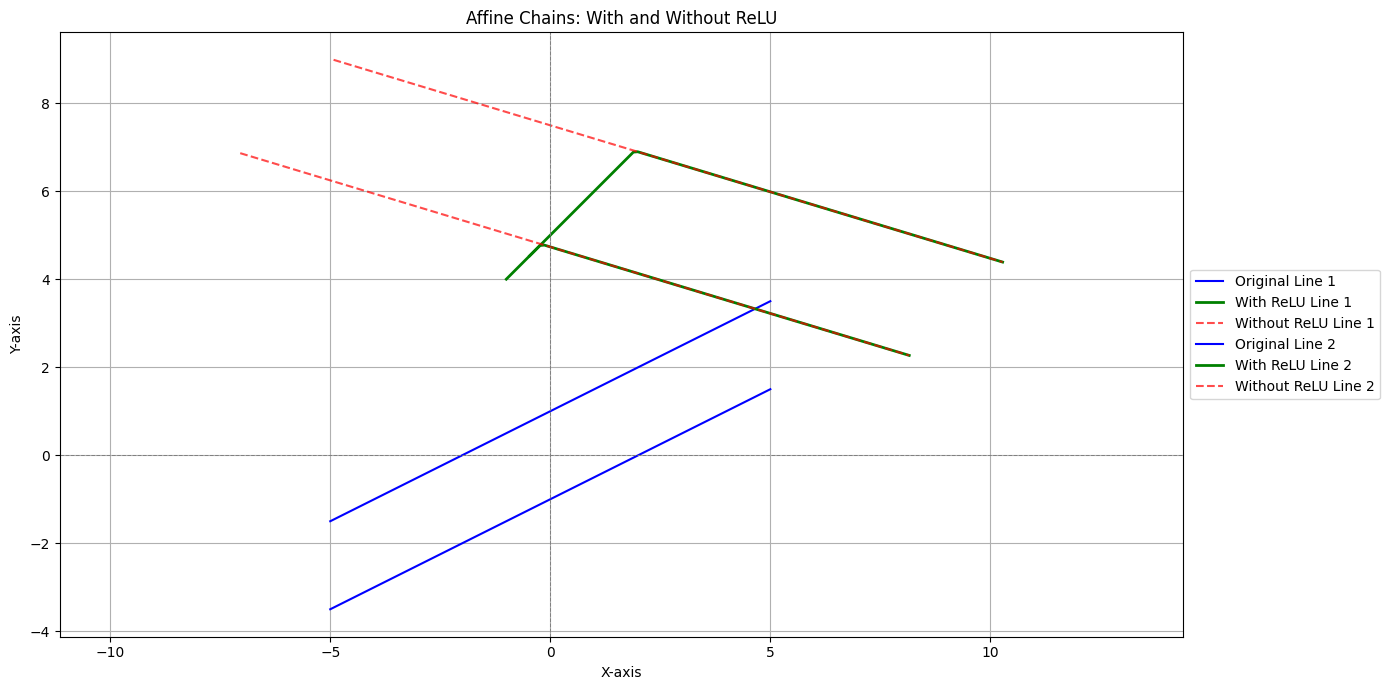

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def plot_affine_with_and_without_relu(original_lines_data, affine_transform1, affine_transform2, title="Affine Chains: With and Without ReLU"):
    plt.figure(figsize=(14, 7))

    # Unpack affine transforms
    M1, t1 = affine_transform1
    M2, t2 = affine_transform2

    for i, (x_coords, y_coords) in enumerate(original_lines_data):
        points_original = np.vstack([x_coords, y_coords])

        # Path 1: Affine -> ReLU -> Affine
        transformed_points_1 = np.dot(M1, points_original) + t1
        activated_points = relu(transformed_points_1)
        final_points_with_relu = np.dot(M2, activated_points) + t2

        # Path 2: Affine -> Affine (effectively one affine transform)
        final_points_without_relu = np.dot(M2, np.dot(M1, points_original) + t1) + t2
        # This can be simplified to: M_combined = M2 @ M1, t_combined = M2 @ t1 + t2
        # final_points_without_relu = np.dot(M2 @ M1, points_original) + (M2 @ t1 + t2)

        # Plot original
        plt.plot(points_original[0], points_original[1], label=f'Original Line {i+1}', color='blue', linestyle='-')

        # Plot with ReLU
        plt.plot(final_points_with_relu[0], final_points_with_relu[1], label=f'With ReLU Line {i+1}', color='green', linestyle='-', linewidth=2)

        # Plot without ReLU
        plt.plot(final_points_without_relu[0], final_points_without_relu[1], label=f'Without ReLU Line {i+1}', color='red', linestyle='--', alpha=0.7)

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Reuse the original lines and affine transforms from previous steps
# Original lines
original_lines_for_relu_example = [
    (np.linspace(-5, 5, 100), 0.5 * np.linspace(-5, 5, 100) + 1),  # y = 0.5x + 1
    (np.linspace(-5, 5, 100), 0.5 * np.linspace(-5, 5, 100) - 1)   # y = 0.5x - 1
]

# Affine Transform 1 (reusing from previous example)
affine_transform_1 = (affine_matrix, translation_vector)

# Affine Transform 2 (reusing from previous example)
affine_transform_2 = (affine_matrix_2, translation_vector_2)

# Plot the results
plot_affine_with_and_without_relu(original_lines_for_relu_example, affine_transform_1, affine_transform_2)

What relu has done here is basically bridge the 2 linear-functions as one conitnuous function which is then reprojected but the 2nd affine.

> separate → fold → reproject

This is the start of the non-trivial behavior of neural nets! The key take aways are:
- Affine's transforms cannot change the topology, they only operate in ways that preserves most of the linearity.
- Introducing a non-linear function like ReLU alters the topology, in this case folding and recoonecting the space to produce a continuous function.

From here, approximating x^3 , sinusoids, or decision boundaries is just a matter of how many folds you're willing to stack.

## Putting it together
Now that we have both the pieces to "fully-parameterize" a model, lets code up a model to learn a simple x^3 function!


In [ ]:
x = np.linspace(-2* math.pi,2 * math.pi, 10000)
y= np.pow(x,3)

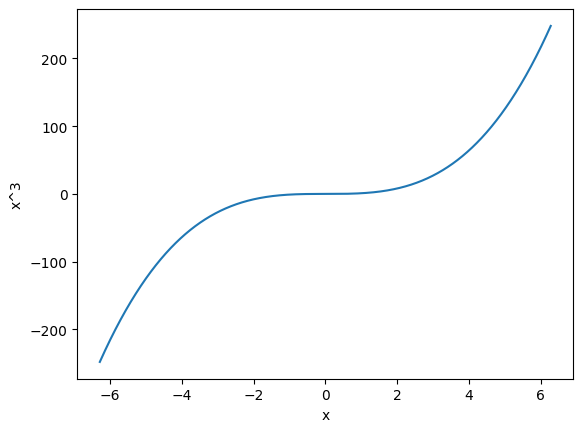

In [ ]:
# @title
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('x^3')
plt.show()

In [ ]:
W1 = np.random.random()
b1 = np.random.random()
W2 = np.random.random()
b2 = np.random.random()
W3 = np.random.random()
b3 = np.random.random()

relu_activation = lambda x : np.maximum(0,x)

In [ ]:
loss_fn = lambda y_pred, y_true: np.square(y_pred - y_true).sum()
d_loss_fn = lambda y_pred, y_true: 2*(y_pred - y_true)

In [ ]:
learning_rate = 1e-4

In [ ]:
loss_history = []

for epoch in range(10):
  for n,i in enumerate(x):
    # forward pass
    z1 = W1*i + b1
    a1 = relu_activation(z1)
    z2 = W2*a1 + b2
    a2 = relu_activation(z2)
    z3 = W3*a2 + b3

    # compute loss
    loss = loss_fn(z3, y[n])
    # compute gradient of loss
    d_loss = d_loss_fn(z3, y[n])

    # calculate gradients of params
    d_W3 = (d_loss * a2).sum()
    d_b3 = d_loss.sum()

    # chain rule going backwards
    d_a2 = (d_loss * W3).sum()
    d_z2 = d_a2 * (a2 > 0)
    # to find the gradients of model params
    d_W2 = (d_z2 * a1).sum()
    d_b2 = d_z2.sum()

    d_a1 = (d_z2 * W2).sum()
    d_z1 = d_a1 * (a1 > 0)

    d_W1 = (d_z1 * i).sum()
    d_b1 = d_z1.sum()

    # weight update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3

  loss_history.append(loss)
  print(f"Epoch {epoch} : loss => {loss_history[-1]}")

Epoch 0 : loss => 38963.98425340505
Epoch 1 : loss => 28762.794106179583
Epoch 2 : loss => 22015.60088931344
Epoch 3 : loss => 17508.437390763884
Epoch 4 : loss => 14378.392395138453
Epoch 5 : loss => 12039.885056353114
Epoch 6 : loss => 10267.542208225294
Epoch 7 : loss => 8880.815997018486
Epoch 8 : loss => 7772.148120585306
Epoch 9 : loss => 6869.41707741155


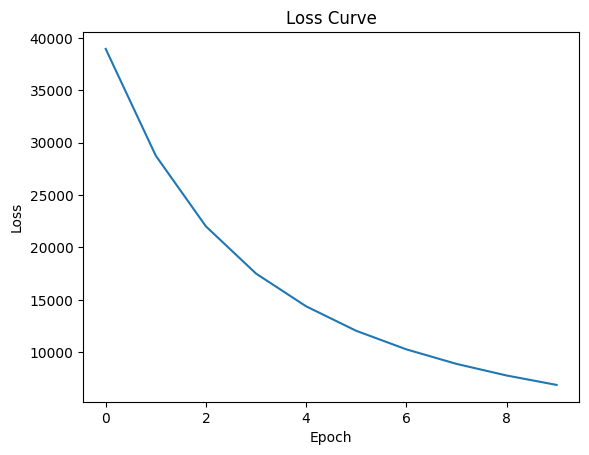

In [ ]:
# @title
# plot loss curve
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

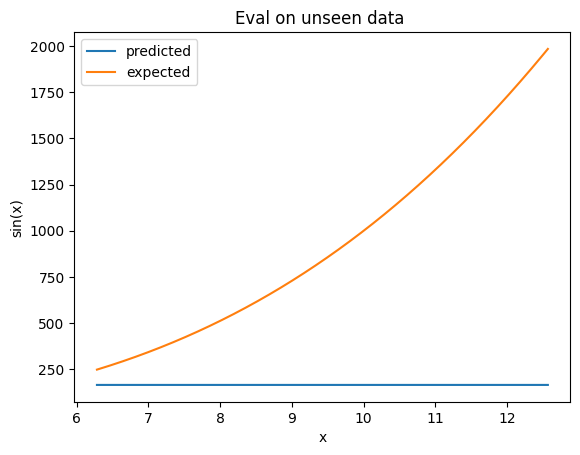

In [ ]:
# @title
# plot out of training samples
new_data = np.linspace(2*math.pi, 4*math.pi,10000)
expected = np.pow(new_data,3)

# predictions
preds = []
for i in new_data:
  z1 = W1*i + b1
  a1 = relu_activation(z1)
  z2 = W2*a1 + b2
  a2 = relu_activation(z2)
  z3 = W3*a2 + b3
  preds.append(z3)

plt.plot(new_data, preds, label='predicted')
plt.plot(new_data, expected, label='expected')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title("Eval on unseen data ")
plt.legend()


## What happened here!? Why can't it learn!!
Even though out loss is so low the model performs poorly on new data!

A bunch of things right off the bat:
1. Just singluar coefficients as weights is probably insufficient to capture the behaviour of a non-linear function like sin() in a composition of affines. Using matricies as weights would improve the complexity that can be modelled by allow more "tuning-knobs" to be learnt by the model.

2. ReLU id doing a `max(x,0)`, this essentially clips all negative values not allowing it to flow freely through the network and influce gradients which bottle-necks learning such that all -ve valued samples are useless! We should consider chaning the activation function.

3. Tune the learning rate, maybe introduce an optimizer, but we can do this once we see the model learning.

## Lets try to address these and how each change improves the model's learning ability

### Using Weight matrix instead of singluar coefficients

In [ ]:
# Lets start by using matrices for weights
W1 = np.random.random((10,1))
b1 = np.random.random((10,1))
W2 = np.random.random((10,10))
b2 = np.random.random((10,1))
W3 = np.random.random((1,10))
b3 = np.random.random((1,1))

relu_activation = lambda x : np.maximum(0,x)
learning_rate = 1e-4

In [ ]:
# because we changed the shapes of W we will neet use a dot product instead of *
loss_history = []

for epoch in range(50):
  epoch_loss = 0
  for n,i in enumerate(x):
    # forward pass
    z1 = np.dot(W1,i) + b1
    a1 = relu_activation(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = relu_activation(z2)
    z3 = np.dot(W3,a2) + b3

    # compute loss
    loss = loss_fn(z3, y[n])
    # compute gradient of loss
    d_loss = d_loss_fn(z3, y[n])

    # calculate gradients of params
    d_W3 = (d_loss * a2).sum()
    d_b3 = d_loss.sum()

    # chain rule going backwards
    d_a2 = (d_loss * W3).sum()
    d_z2 = d_a2 * (a2 > 0)
    # to find the gradients of model params
    d_W2 = (d_z2 * a1).sum()
    d_b2 = d_z2.sum()

    d_a1 = (d_z2 * W2).sum()
    d_z1 = d_a1 * (a1 > 0)

    d_W1 = (d_z1 * i).sum()
    d_b1 = d_z1.sum()

    # weight update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3
    epoch_loss += loss.item()
  loss_history.append(epoch_loss/len(x))
  print(f"Epoch {epoch} : loss => {loss_history[-1]}") if epoch % 10 == 0 else None

Epoch 0 : loss => 7162.059253795404
Epoch 10 : loss => 8542.627140513328
Epoch 20 : loss => 8542.627144452454
Epoch 30 : loss => 8542.627144452454
Epoch 40 : loss => 8542.627144452454


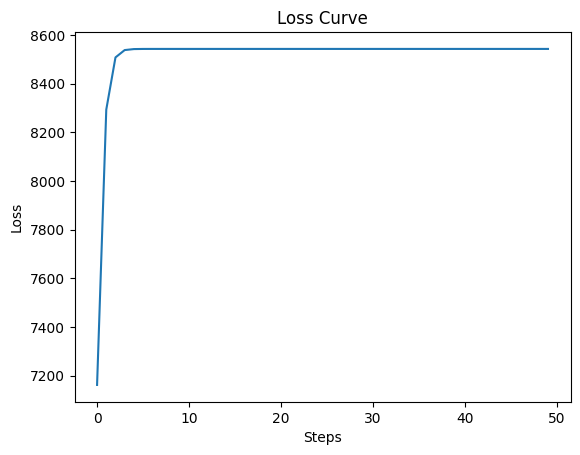

In [ ]:
# @title
# plot loss curve
plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

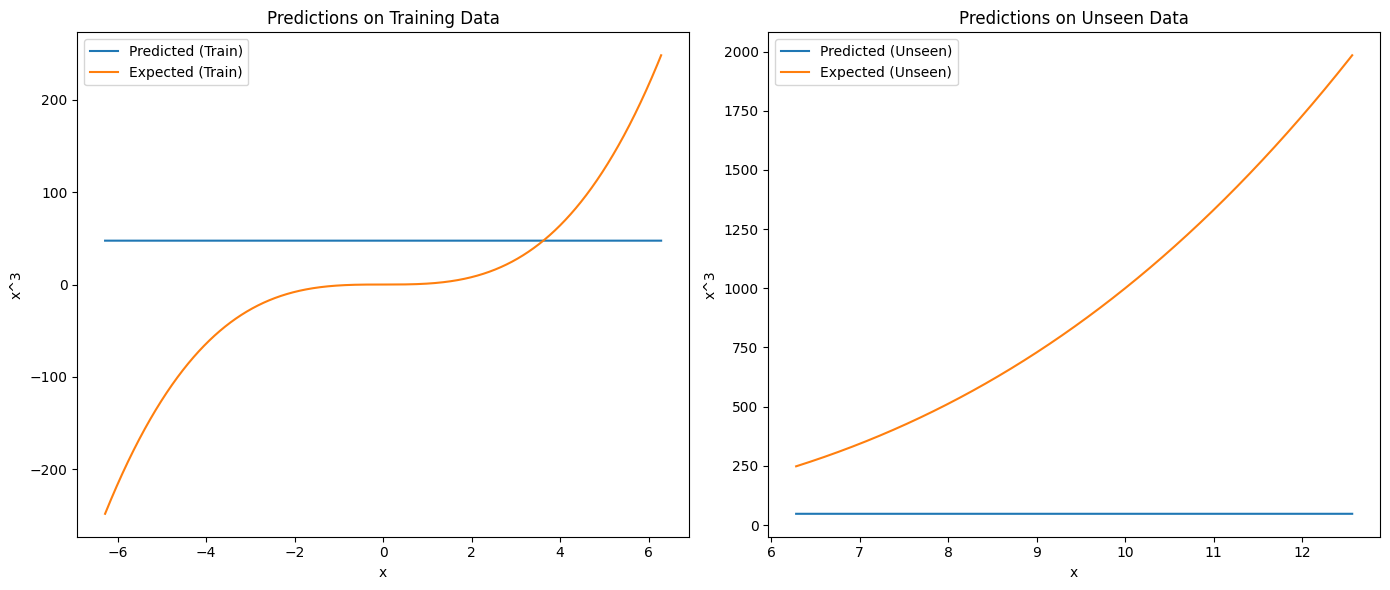

In [ ]:
# @title

def get_predictions(data, W1, b1, W2, b2, W3, b3, activation_fn):
  preds = []
  for i_scalar in data:
    i = np.array([[i_scalar]])
    z1 = np.dot(W1,i) + b1
    a1 = activation_fn(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = activation_fn(z2)
    z3 = np.dot(W3,a2) + b3
    preds.append(z3.item())
  return np.array(preds)

# Predictions on training data
preds_train = get_predictions(x, W1, b1, W2, b2, W3, b3, relu_activation)

# Predictions on unseen data
new_data_unseen = np.linspace(2*math.pi, 4*math.pi,10000)
expected_unseen = np.pow(new_data_unseen,3)
preds_unseen = get_predictions(new_data_unseen, W1, b1, W2, b2, W3, b3, relu_activation)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Training Data
axes[0].plot(x, preds_train, label='Predicted (Train)')
axes[0].plot(x, y, label='Expected (Train)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x^3')
axes[0].set_title('Predictions on Training Data')
axes[0].legend()

# Plot for Unseen Data
axes[1].plot(new_data_unseen, preds_unseen, label='Predicted (Unseen)')
axes[1].plot(new_data_unseen, expected_unseen, label='Expected (Unseen)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('x^3')
axes[1].set_title('Predictions on Unseen Data')
axes[1].legend()

plt.tight_layout()
plt.show()

Again that hasnt done much sadly, the loss seems to be stuck just after 1 epoch and never really learn much on iteration.

### Picking a better loss fn

lets try changing the loss fn :
> leaky relu : f(x) = { x if x > 0, aplha*x if x<0 }

This should address the issue discussed previously.

In [ ]:
import numpy as np

# Lets start by using matrices for weights
# "He" initialization for ReLU-like activations
W1 = np.random.randn(10,1) * np.sqrt(2 / 1) # fan_in = 1
b1 = np.zeros((10,1)) # Bias for 10 neurons

W2 = np.random.randn(10,10) * np.sqrt(2 / 10) # fan_in = 10
b2 = np.zeros((10,1)) # Bias for 10 neurons

W3 = np.random.randn(1,10) * np.sqrt(2 / 10) # fan_in = 10
b3 = np.zeros((1,1)) # Bias for 1 output neuron

alpha = 0.01

leaky_relu_activation = lambda x : np.maximum(alpha*x,x)
d_leaky_relu_activation = lambda x : np.where(x > 0, 1.0, alpha) # Ensure float for alpha

tanh_activation = lambda x : np.tanh(x)
d_tanh_activation = lambda x : 1 - np.tanh(x)**2

learning_rate = 1e-4

#### Training With Leaky ReLU

In [ ]:
# because we changed the shapes of W we will neet use a dot product instead of *
loss_history = []

for epoch in range(100): # Increased epochs for training
  epoch_loss = 0
  for n,i_scalar in enumerate(x): # Rename i to i_scalar to avoid confusion
    i = np.array([[i_scalar]]) # Treat input as (1,1) vector

    # forward pass
    z1 = np.dot(W1,i) + b1 # W1 (10,1) @ i (1,1) + b1 (10,1) => (10,1)
    a1 = leaky_relu_activation(z1) # (10,1)
    z2 = np.dot(W2,a1) + b2 # W2 (10,10) @ a1 (10,1) + b2 (10,1) => (10,1)
    a2 = leaky_relu_activation(z2) # (10,1)
    z3 = np.dot(W3,a2) + b3 # W3 (1,10) @ a2 (10,1) + b3 (1,1) => (1,1)

    # compute loss
    y_true = np.array([[y[n]]]) # Ensure y_true is also (1,1) for consistency
    loss = loss_fn(z3, y_true)
    # compute gradient of loss
    d_loss = d_loss_fn(z3, y_true) # d_loss is (1,1)

    # calculate gradients of params
    # d_loss is dL/dz3
    d_W3 = d_loss @ a2.T # (1,1) @ (1,10) => (1,10)
    d_b3 = d_loss # (1,1)

    # chain rule going backwards
    d_a2 = W3.T @ d_loss # W3.T (10,1) @ d_loss (1,1) => (10,1)
    d_z2 = d_a2 * d_leaky_relu_activation(z2) # Element-wise product (10,1)
    d_W2 = d_z2 @ a1.T # (10,1) @ (1,10) => (10,10)
    d_b2 = d_z2 # (10,1)

    d_a1 = W2.T @ d_z2 # W2.T (10,10) @ d_z2 (10,1) => (10,1)
    d_z1 = d_a1 * d_leaky_relu_activation(z1) # Element-wise product (10,1)

    d_W1 = d_z1 @ i.T # (10,1) @ (1,1) => (10,1)
    d_b1 = d_z1 # (10,1)

    # weight update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3
    epoch_loss += loss.item() # Accumulate loss for the epoch

  loss_history.append(epoch_loss/len(x)) # Append scalar loss to history
  print(f"Epoch {epoch} : loss => {loss_history[-1]}") if epoch % 10 == 0 else None

print(f"Final loss after {epoch+1} epochs: {loss_history[-1]}")

Epoch 0 : loss => 545.7516766434843
Epoch 10 : loss => 36.3195584506501
Epoch 20 : loss => 40.46712857993742
Epoch 30 : loss => 23.011800853121546
Epoch 40 : loss => 13.467292910164831
Epoch 50 : loss => 12.023557583116757
Epoch 60 : loss => 20.759158400189712
Epoch 70 : loss => 13.724849257153116
Epoch 80 : loss => 12.427824895920184
Epoch 90 : loss => 9.465387483943351
Final loss after 100 epochs: 14.892720153904255


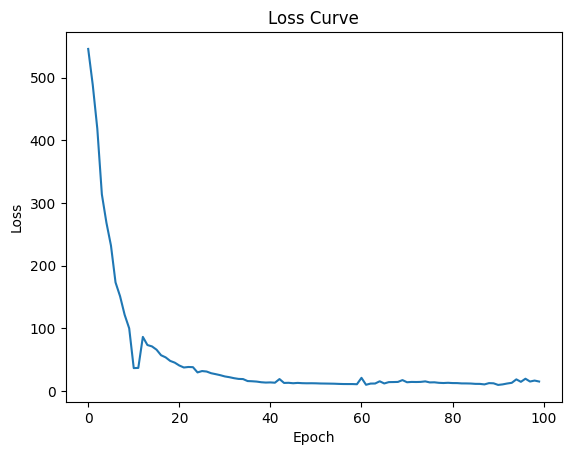

In [ ]:
# @title
# plot loss curve
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

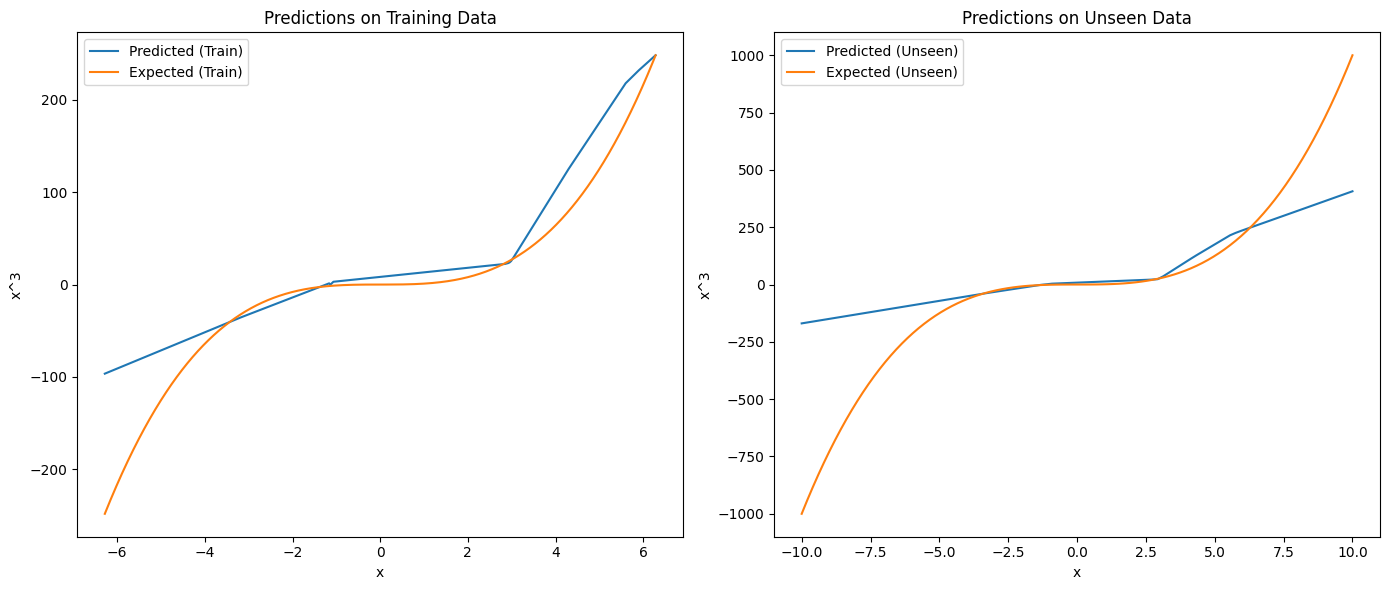

In [ ]:
# @title

def get_predictions(data, W1, b1, W2, b2, W3, b3, activation_fn):
  preds = []
  for i_scalar in data:
    i = np.array([[i_scalar]])
    z1 = np.dot(W1,i) + b1
    a1 = activation_fn(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = activation_fn(z2)
    z3 = np.dot(W3,a2) + b3
    preds.append(z3.item())
  return np.array(preds)

# Predictions on training data
preds_train = get_predictions(x, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Predictions on unseen data
new_data_unseen = np.linspace(-10, 10,100)
expected_unseen = np.pow(new_data_unseen,3)
preds_unseen = get_predictions(new_data_unseen, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Training Data
axes[0].plot(x, preds_train, label='Predicted (Train)')
axes[0].plot(x, y, label='Expected (Train)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x^3')
axes[0].set_title('Predictions on Training Data')
axes[0].legend()

# Plot for Unseen Data
axes[1].plot(new_data_unseen, preds_unseen, label='Predicted (Unseen)')
axes[1].plot(new_data_unseen, expected_unseen, label='Expected (Unseen)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('x^3')
axes[1].set_title('Predictions on Unseen Data')
axes[1].legend()

plt.tight_layout()
plt.show()

## Seeing Progress!
We can now see the model is showing signs of learning the data!

**Good Signs**
- Loss drops continuously, i.e: the model is inching closed to a minima in the loss fn space
- The model is now atleast able to represent the training data approximately!

## Things we can do to further improve this!

First things is to normalize the trianing data, currently we are training the model on following dataset:
```
x = np.linspace(-2* math.pi,2 * math.pi, 10000)
y= np.pow(x,3)
```

Notice that the min/max value the model needs to learn vary alot! ( 1^3 = 1 , but 10^3 = 1000 ), cube grows explosively so scaling the values and hence needs to be scaled accordingly, without which(like in the current case) we would have massive gradients just because the value we are trying to learn is big and not necessary due to the model being incorrect! Fixing this improves representation!

Next we can introduce "Stochasticity" to our gradient updates, instead of following a noisy path in the loss terrain we can accumulate and understand a direction on a "mini-batch" before moving about the loss-landscape which will help us efficiently move to a minima.

> Other improvement ideas can be added here

### Improvement 1: Data Normalization

But first lets test our hypothesis that gradients are un-desirably affect by the value of the function and if normalization helps us avoid it!



In [ ]:
# Discovering gradient explosion! Lets use the training code from before
# and accumulate the gradients to see whats happening!

In [ ]:
# Same as before,we just track gradients into a var here
loss_history = []
epoch_gradients = []


for epoch in range(100):
  epoch_loss = 0
  grads = []
  for n,i_scalar in enumerate(x): # Rename i to i_scalar to avoid confusion
    i = np.array([[i_scalar]]) # Treat input as (1,1) vector

    # forward pass
    z1 = np.dot(W1,i) + b1 # W1 (10,1) @ i (1,1) + b1 (10,1) => (10,1)
    a1 = leaky_relu_activation(z1) # (10,1)
    z2 = np.dot(W2,a1) + b2 # W2 (10,10) @ a1 (10,1) + b2 (10,1) => (10,1)
    a2 = leaky_relu_activation(z2) # (10,1)
    z3 = np.dot(W3,a2) + b3 # W3 (1,10) @ a2 (10,1) + b3 (1,1) => (1,1)

    # compute loss
    y_true = np.array([[y[n]]]) # Ensure y_true is also (1,1) for consistency
    loss = loss_fn(z3, y_true)
    # compute gradient of loss
    d_loss = d_loss_fn(z3, y_true) # d_loss is (1,1)

    # calculate gradients of params
    # d_loss is dL/dz3
    d_W3 = d_loss @ a2.T # (1,1) @ (1,10) => (1,10)
    d_b3 = d_loss # (1,1)

    # chain rule going backwards
    d_a2 = W3.T @ d_loss # W3.T (10,1) @ d_loss (1,1) => (10,1)
    d_z2 = d_a2 * d_leaky_relu_activation(z2) # Element-wise product (10,1)
    d_W2 = d_z2 @ a1.T # (10,1) @ (1,10) => (10,10)
    d_b2 = d_z2 # (10,1)

    d_a1 = W2.T @ d_z2 # W2.T (10,10) @ d_z2 (10,1) => (10,1)
    d_z1 = d_a1 * d_leaky_relu_activation(z1) # Element-wise product (10,1)

    d_W1 = d_z1 @ i.T # (10,1) @ (1,1) => (10,1)
    d_b1 = d_z1 # (10,1)

    # accumulate gradients
    grads.append({
        "W1": d_W1,
        "b1": d_b1,
        "W2": d_W2,
        "b2": d_b2,
        "W3": d_W3,
        "b3": d_b3
    })
    # weight update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3
    epoch_loss += loss.item() # Accumulate loss for the epoch

  loss_history.append(epoch_loss/len(x)) # Append scalar loss to history
  epoch_gradients.append(grads)
  print(f"Epoch {epoch} : loss => {loss_history[-1]}") if epoch % 10 == 0 else None

print(f"Final loss after {epoch+1} epochs: {loss_history[-1]}")

Epoch 0 : loss => 14.600163009488048
Epoch 10 : loss => 12.680593163007726
Epoch 20 : loss => 13.05129889901881
Epoch 30 : loss => 8.961820408222943
Epoch 40 : loss => 7.680091349138189
Epoch 50 : loss => 7.5723869112398985
Epoch 60 : loss => 6.833131431512641
Epoch 70 : loss => 7.143180057287957
Epoch 80 : loss => 6.074571421410207
Epoch 90 : loss => 5.598895993587664
Final loss after 100 epochs: 5.093325593197536


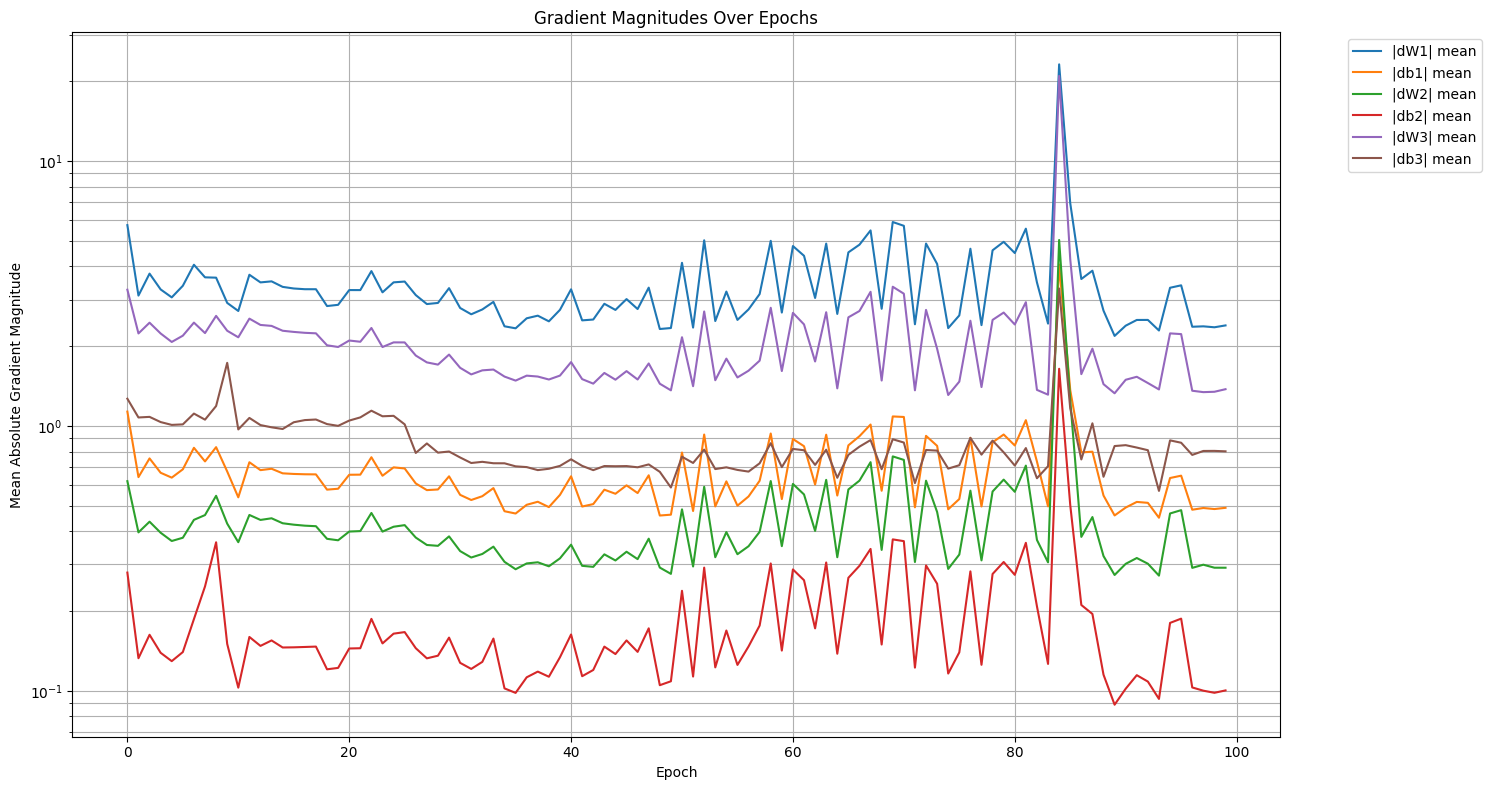

In [ ]:
# @title
# now we will plot the gradient values we recorded during trainin for each parameter

import matplotlib.pyplot as plt

def plot_gradient_magnitudes(epoch_gradients, param_names, title="Gradient Magnitudes Over Epochs"):
    plt.figure(figsize=(15, 8))

    # Prepare data structure for plotting
    gradient_data = {name: [] for name in param_names}

    # Extract mean absolute gradient for each parameter per epoch
    for epoch_grads_list in epoch_gradients:
        for param_name in param_names:
            # Calculate the mean absolute value of the gradients for the current parameter
            # epoch_grads_list is a list of dicts, each dict for a single iteration (n, i_scalar)
            # We need to average over all iterations within an epoch and then take the mean of abs values

            # Handle cases where gradient is a scalar or an array
            avg_grad_magnitude = np.mean([np.abs(grads[param_name]).mean() if hasattr(grads[param_name], 'mean') else np.abs(grads[param_name]) for grads in epoch_grads_list])
            gradient_data[param_name].append(avg_grad_magnitude)

    # Plot each parameter's gradient magnitude
    for param_name, magnitudes in gradient_data.items():
        plt.plot(magnitudes, label=f'|d{param_name}| mean')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Gradient Magnitude')
    plt.yscale('log') # Use log scale to better visualize wide ranges of magnitudes
    plt.grid(True, which="both", ls="-")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Define the names of the parameters whose gradients were captured
param_names = ["W1", "b1", "W2", "b2", "W3", "b3"]

# Call the plotting function
plot_gradient_magnitudes(epoch_gradients, param_names)


In [ ]:
# Normalize the training data
normd_x = (x - np.mean(x)) / np.std(x)
normd_y = (y - np.mean(y)) / np.std(y)

In [ ]:
# reset params and train with normalized data!

In [ ]:
# @title

# "He" initialization for ReLU-like activations
W1 = np.random.randn(10,1) * np.sqrt(2 / 1) # fan_in = 1
b1 = np.zeros((10,1)) # Bias for 10 neurons

W2 = np.random.randn(10,10) * np.sqrt(2 / 10) # fan_in = 10
b2 = np.zeros((10,1)) # Bias for 10 neurons

W3 = np.random.randn(1,10) * np.sqrt(2 / 10) # fan_in = 10
b3 = np.zeros((1,1)) # Bias for 1 output neuron


loss_history = []
epoch_gradients = []


for epoch in range(100):
  epoch_loss = 0
  grads = []
  for n,i_scalar in enumerate(normd_x): # Rename i to i_scalar to avoid confusion
    i = np.array([[i_scalar]]) # Treat input as (1,1) vector

    # forward pass
    z1 = np.dot(W1,i) + b1 # W1 (10,1) @ i (1,1) + b1 (10,1) => (10,1)
    a1 = leaky_relu_activation(z1) # (10,1)
    z2 = np.dot(W2,a1) + b2 # W2 (10,10) @ a1 (10,1) + b2 (10,1) => (10,1)
    a2 = leaky_relu_activation(z2) # (10,1)
    z3 = np.dot(W3,a2) + b3 # W3 (1,10) @ a2 (10,1) + b3 (1,1) => (1,1)

    # compute loss
    y_true = np.array([[normd_y[n]]]) # Ensure y_true is also (1,1) for consistency
    loss = loss_fn(z3, y_true)
    # compute gradient of loss
    d_loss = d_loss_fn(z3, y_true) # d_loss is (1,1)

    # calculate gradients of params
    # d_loss is dL/dz3
    d_W3 = d_loss @ a2.T # (1,1) @ (1,10) => (1,10)
    d_b3 = d_loss # (1,1)

    # chain rule going backwards
    d_a2 = W3.T @ d_loss # W3.T (10,1) @ d_loss (1,1) => (10,1)
    d_z2 = d_a2 * d_leaky_relu_activation(z2) # Element-wise product (10,1)
    d_W2 = d_z2 @ a1.T # (10,1) @ (1,10) => (10,10)
    d_b2 = d_z2 # (10,1)

    d_a1 = W2.T @ d_z2 # W2.T (10,10) @ d_z2 (10,1) => (10,1)
    d_z1 = d_a1 * d_leaky_relu_activation(z1) # Element-wise product (10,1)

    d_W1 = d_z1 @ i.T # (10,1) @ (1,1) => (10,1)
    d_b1 = d_z1 # (10,1)

    # accumulate gradients
    grads.append({
        "W1": d_W1,
        "b1": d_b1,
        "W2": d_W2,
        "b2": d_b2,
        "W3": d_W3,
        "b3": d_b3
    })
    # weight update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3
    epoch_loss += loss.item() # Accumulate loss for the epoch

  loss_history.append(epoch_loss/len(x)) # Append scalar loss to history
  epoch_gradients.append(grads)
  print(f"Epoch {epoch} : loss => {loss_history[-1]}") if epoch % 10 == 0 else None

print(f"Final loss after {epoch+1} epochs: {loss_history[-1]}")

Epoch 0 : loss => 0.08355198174370383
Epoch 10 : loss => 0.032460956375213526
Epoch 20 : loss => 0.013037862617168584
Epoch 30 : loss => 0.0069121765616131925
Epoch 40 : loss => 0.004125723450507243
Epoch 50 : loss => 0.0028075583112201017
Epoch 60 : loss => 0.0021030038325613462
Epoch 70 : loss => 0.0016752283528413314
Epoch 80 : loss => 0.0013953499515680023
Epoch 90 : loss => 0.0012024488081665407
Final loss after 100 epochs: 0.001074972432041123


We can clearly see that normalizing the training data has largely changed the magnitude of the model params, this clearly indicates that most of the "param updates" were influced by the value function instead of the actual gradient values.

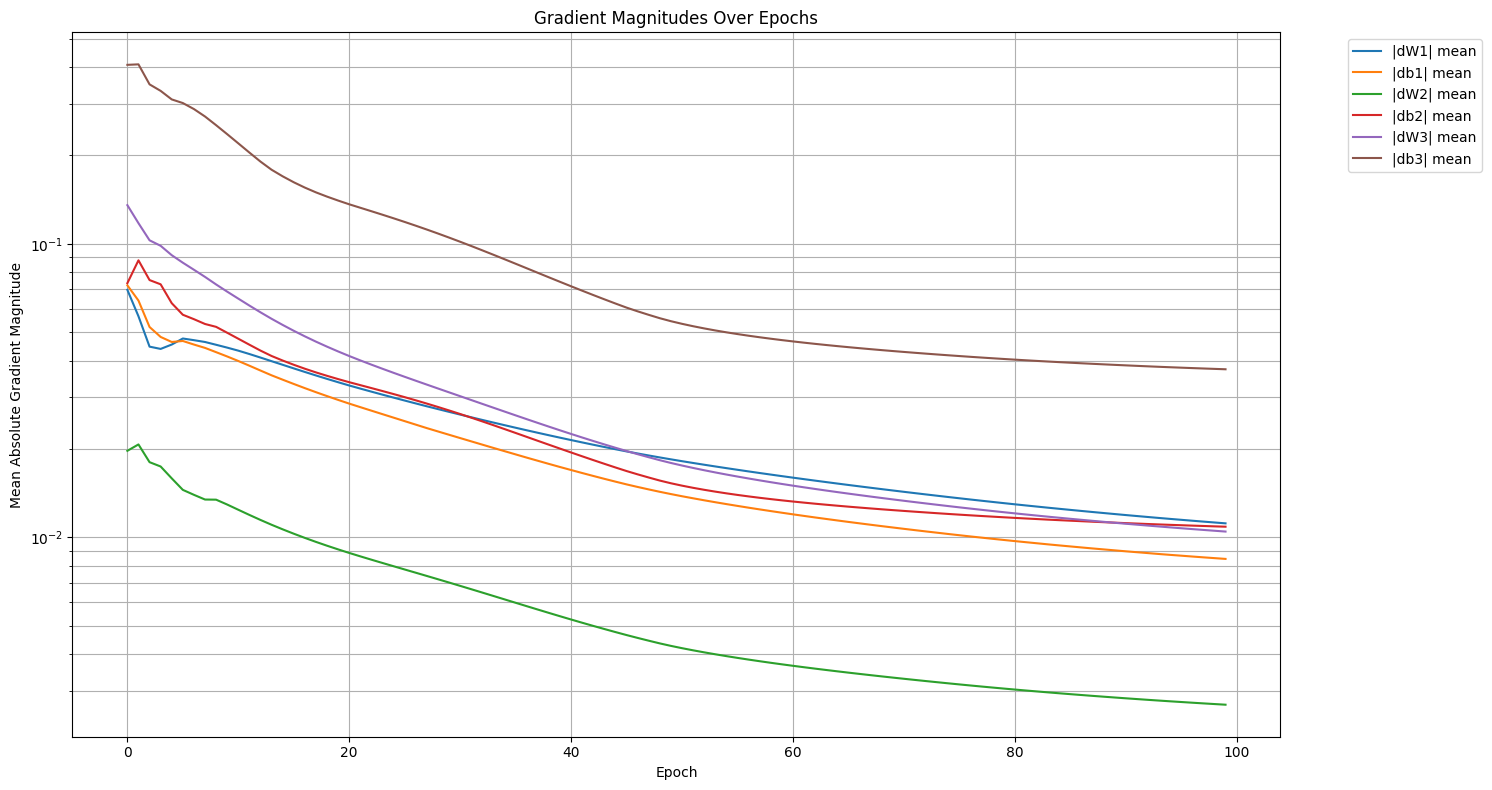

In [ ]:
# @title
# And plot the gradients for normalized data training run

# Call the plotting function
plot_gradient_magnitudes(epoch_gradients, param_names)

***Both the gradient values and the loss look a lot more stable now!***

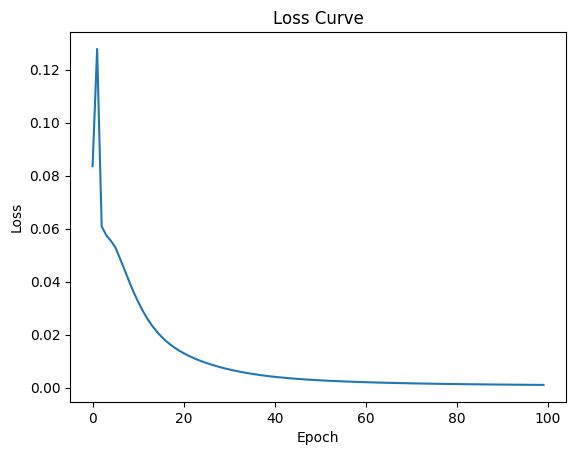

In [ ]:
# Lets also plot the loss curve and sample outside training values now!
# @title
# plot loss curve
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

> IMPORTANT : Note that we have now trained the model on normalized values, hence any input of the model will NOT be just `x` but `normd_x` and any inference of the model will be `normd_y` and not just `y`, hence we need a transformation layer now! Lets wrap it into a tiny object.


In [ ]:
# @title
class StandardScaler:
    def fit(self, x):
        self.mean = np.mean(x)
        self.std = np.std(x)

    def transform(self, x):
        return (x - self.mean) / self.std

    def inverse_transform(self, x):
        return x * self.std + self.mean

In [ ]:
# @title
input_scaler = StandardScaler()
input_scaler.fit(x)

output_scaler = StandardScaler()
output_scaler.fit(y)

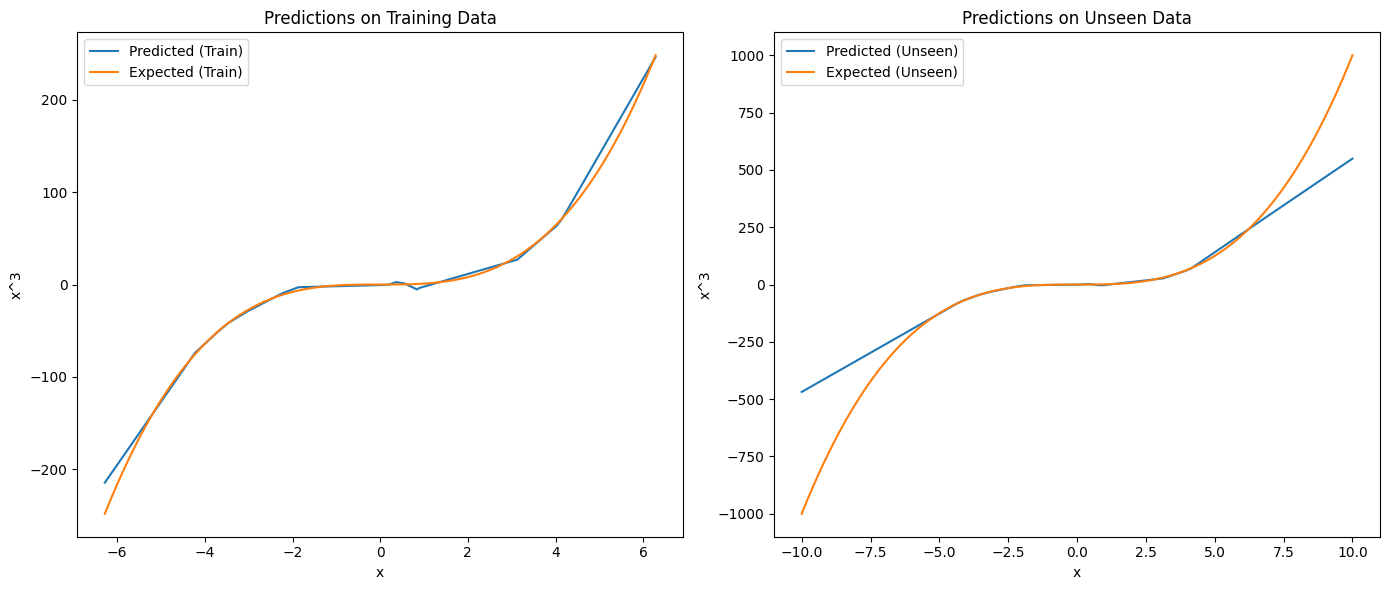

In [ ]:
# @title

def get_predictions_with_normd(data, W1, b1, W2, b2, W3, b3, activation_fn):
  preds = []
  for i in data:
    i = input_scaler.transform(np.array([[i]]))

    z1 = np.dot(W1,i) + b1
    a1 = activation_fn(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = activation_fn(z2)
    z3 = np.dot(W3,a2) + b3
    out = output_scaler.inverse_transform(z3)
    preds.append(out)

  return np.array(preds)

# Predictions on training data
preds_train = get_predictions_with_normd(x, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Predictions on unseen data
new_data_unseen = np.linspace(-10, 10,100)
expected_unseen = np.pow(new_data_unseen,3)
preds_unseen = get_predictions_with_normd(new_data_unseen, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Training Data
axes[0].plot(x, preds_train.squeeze(), label='Predicted (Train)')
axes[0].plot(x, y, label='Expected (Train)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x^3')
axes[0].set_title('Predictions on Training Data')
axes[0].legend()

# Plot for Unseen Data
axes[1].plot(new_data_unseen, preds_unseen.squeeze(), label='Predicted (Unseen)')
axes[1].plot(new_data_unseen, expected_unseen, label='Expected (Unseen)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('x^3')
axes[1].set_title('Predictions on Unseen Data')
axes[1].legend()

plt.tight_layout()
plt.show()

***The model is able to generalize and learn a LOT LOT better!***


### Improvement 2: Stochasticity / Regularization


In [ ]:
# We will now add SGD with mini-batches, i.e: we will create small-batches of the data
# used in the training loop and gradient will be updated once per batch instead of once per sample.

# we up the epoch cound and learning_rate here since we are upgrading gradients less frequently.

In [ ]:
# @title

# "He" initialization for ReLU-like activations
W1 = np.random.randn(10,1) * np.sqrt(2 / 1) # fan_in = 1
b1 = np.zeros((10,1)) # Bias for 10 neurons

W2 = np.random.randn(10,10) * np.sqrt(2 / 10) # fan_in = 10
b2 = np.zeros((10,1)) # Bias for 10 neurons

W3 = np.random.randn(1,10) * np.sqrt(2 / 10) # fan_in = 10
b3 = np.zeros((1,1)) # Bias for 1 output neuron

batch_size = 64 # Define batch size
learning_rate = 0.001 # New
loss_history = []
epoch_gradients = []


for epoch in range(300): # Note i increase the epoch count for this run
  epoch_loss = 0
  grads = []

  # Shuffle data at the beginning of each epoch
  permutation = np.random.permutation(len(normd_x))
  shuffled_x = normd_x[permutation]
  shuffled_y = normd_y[permutation]

  for batch_start in range(0, len(shuffled_x), batch_size):
    batch_end = batch_start + batch_size
    x_batch = shuffled_x[batch_start:batch_end]
    y_batch = shuffled_y[batch_start:batch_end]

    # Initialize batch gradients to zero
    d_W1_batch, d_b1_batch = np.zeros_like(W1), np.zeros_like(b1)
    d_W2_batch, d_b2_batch = np.zeros_like(W2), np.zeros_like(b2)
    d_W3_batch, d_b3_batch = np.zeros_like(W3), np.zeros_like(b3)

    batch_loss = 0

    for n,i_scalar in enumerate(x_batch): # Iterate through samples in the mini-batch
      i = np.array([[i_scalar]]) # Treat input as (1,1) vector

      # forward pass
      z1 = np.dot(W1,i) + b1 # W1 (10,1) @ i (1,1) + b1 (10,1) => (10,1)
      a1 = leaky_relu_activation(z1) # (10,1)
      z2 = np.dot(W2,a1) + b2 # W2 (10,10) @ a1 (10,1) + b2 (10,1) => (10,1)
      a2 = leaky_relu_activation(z2) # (10,1)
      z3 = np.dot(W3,a2) + b3 # W3 (1,10) @ a2 (10,1) + b3 (1,1) => (1,1)

      # compute loss
      y_true = np.array([[y_batch[n]]]) # Ensure y_true is also (1,1) for consistency
      loss = loss_fn(z3, y_true)
      batch_loss += loss.item() # Accumulate loss for the batch

      # compute gradient of loss
      d_loss = d_loss_fn(z3, y_true) # d_loss is (1,1)

      # calculate gradients of params
      # d_loss is dL/dz3
      d_W3 = d_loss @ a2.T # (1,1) @ (1,10) => (1,10)
      d_b3 = d_loss # (1,1)

      # chain rule going backwards
      d_a2 = W3.T @ d_loss # W3.T (10,1) @ d_loss (1,1) => (10,1)
      d_z2 = d_a2 * d_leaky_relu_activation(z2) # Element-wise product (10,1)
      d_W2 = d_z2 @ a1.T # (10,1) @ (1,10) => (10,10)
      d_b2 = d_z2 # (10,1)

      d_a1 = W2.T @ d_z2 # W2.T (10,10) @ d_z2 (10,1) => (10,1)
      d_z1 = d_a1 * d_leaky_relu_activation(z1) # Element-wise product (10,1)

      d_W1 = d_z1 @ i.T # (10,1) @ (1,1) => (10,1)
      d_b1 = d_z1 # (10,1)

      # Accumulate gradients for the current batch
      d_W1_batch += d_W1
      d_b1_batch += d_b1
      d_W2_batch += d_W2
      d_b2_batch += d_b2
      d_W3_batch += d_W3
      d_b3_batch += d_b3

    # Average gradients over the batch and update weights
    W1 -= learning_rate * (d_W1_batch / batch_size)
    b1 -= learning_rate * (d_b1_batch / batch_size)
    W2 -= learning_rate * (d_W2_batch / batch_size)
    b2 -= learning_rate * (d_b2_batch / batch_size)
    W3 -= learning_rate * (d_W3_batch / batch_size)
    b3 -= learning_rate * (d_b3_batch / batch_size)

    # Store averaged gradients (optional, for plotting)
    grads.append({
        "W1": d_W1_batch / batch_size,
        "b1": d_b1_batch / batch_size,
        "W2": d_W2_batch / batch_size,
        "b2": d_b2_batch / batch_size,
        "W3": d_W3_batch / batch_size,
        "b3": d_b3_batch / batch_size
    })
    epoch_loss += batch_loss

  loss_history.append(epoch_loss / len(shuffled_x)) # Append average loss for the epoch
  epoch_gradients.append(grads)
  print(f"Epoch {epoch} : loss => {loss_history[-1]}") if epoch % 10 == 0 else None

print(f"Final loss after {epoch+1} epochs: {loss_history[-1]}")

Epoch 0 : loss => 0.4903733315461906
Epoch 10 : loss => 0.147117657607077
Epoch 20 : loss => 0.09056906374486742
Epoch 30 : loss => 0.06214024042575127
Epoch 40 : loss => 0.04664045959173357
Epoch 50 : loss => 0.03701318611425665
Epoch 60 : loss => 0.03005184549822399
Epoch 70 : loss => 0.024528795304825754
Epoch 80 : loss => 0.0199110598256143
Epoch 90 : loss => 0.016168885611033336
Epoch 100 : loss => 0.013294878355790093
Epoch 110 : loss => 0.011086805224571762
Epoch 120 : loss => 0.009367004359527474
Epoch 130 : loss => 0.008026457605092432
Epoch 140 : loss => 0.006965309445545795
Epoch 150 : loss => 0.006115625394607309
Epoch 160 : loss => 0.005428905665868924
Epoch 170 : loss => 0.004867348655918372
Epoch 180 : loss => 0.004402010864335771
Epoch 190 : loss => 0.004016476940707675
Epoch 200 : loss => 0.003687583668749394
Epoch 210 : loss => 0.0034077828319778775
Epoch 220 : loss => 0.0031683180152204658
Epoch 230 : loss => 0.002960032402355615
Epoch 240 : loss => 0.002776996392910

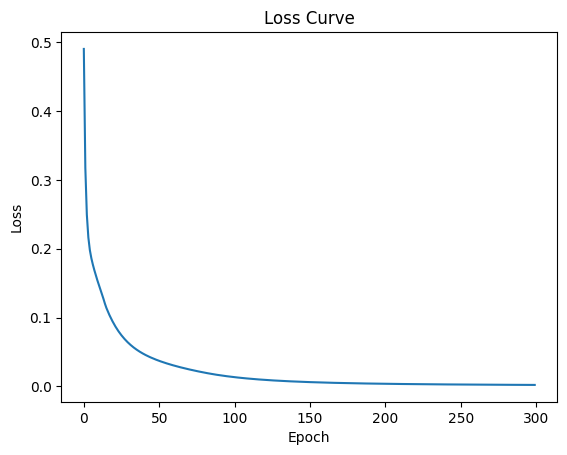

In [ ]:
# @title
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

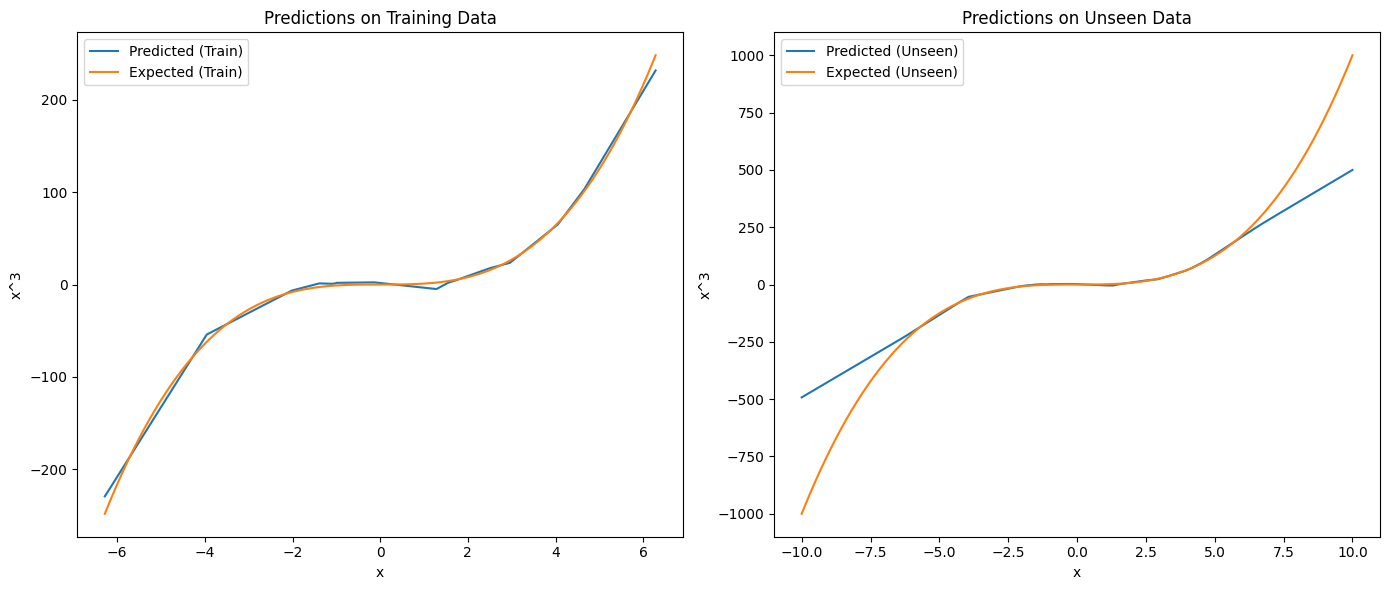

In [ ]:
# @title

# Predictions on training data
preds_train = get_predictions_with_normd(x, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Predictions on unseen data
new_data_unseen = np.linspace(-10, 10,100)
expected_unseen = np.pow(new_data_unseen,3)
preds_unseen = get_predictions_with_normd(new_data_unseen, W1, b1, W2, b2, W3, b3, leaky_relu_activation)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Training Data
axes[0].plot(x, preds_train.squeeze(), label='Predicted (Train)')
axes[0].plot(x, y, label='Expected (Train)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x^3')
axes[0].set_title('Predictions on Training Data')
axes[0].legend()

# Plot for Unseen Data
axes[1].plot(new_data_unseen, preds_unseen.squeeze(), label='Predicted (Unseen)')
axes[1].plot(new_data_unseen, expected_unseen, label='Expected (Unseen)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('x^3')
axes[1].set_title('Predictions on Unseen Data')
axes[1].legend()

plt.tight_layout()
plt.show()

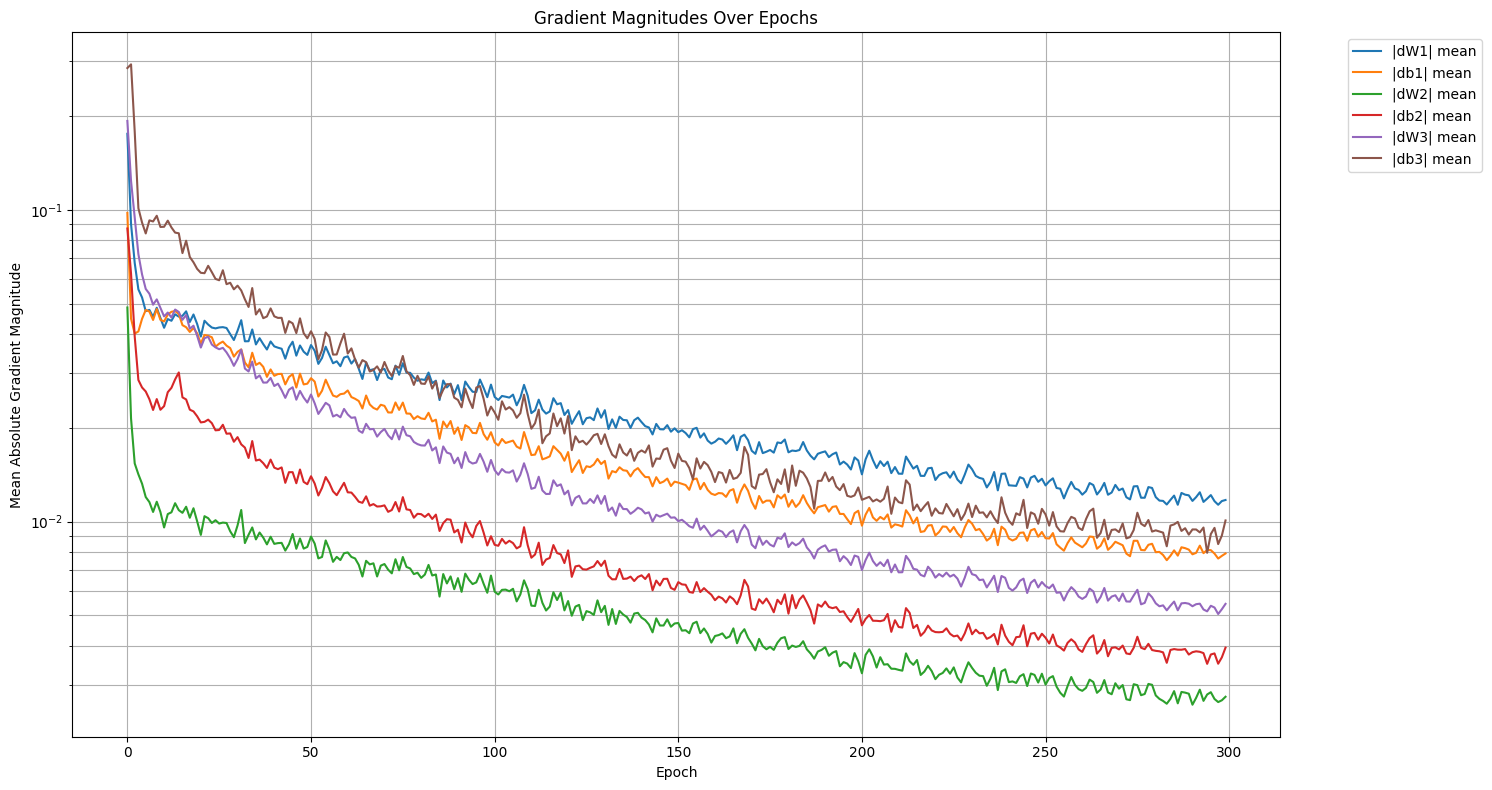

In [ ]:
plot_gradient_magnitudes(epoch_gradients, param_names)